## 1. Importing required Libraries and reading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)
pd.set_option('display.expand_frame_repr',False)
pd.set_option('display.max_columns',None)

In [2]:
airbnb = pd.read_csv(r"C:\Users\SUKANYA\Downloads\AB_NYC_2019.csv")
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [3]:
airbnb.shape

(48895, 16)

In [4]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## 2. Binning the Categorical Variables into Groups 

#### Note:  Categorization enables a deeper understanding of relationships and connections between elements, facilitating more effective communication of our findings.

### 2.1  Categorization of the "price" column into 5 groups

In [6]:
airbnb['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [7]:
airbnb['price'].value_counts()

price
100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: count, Length: 674, dtype: int64

<Axes: ylabel='Frequency'>

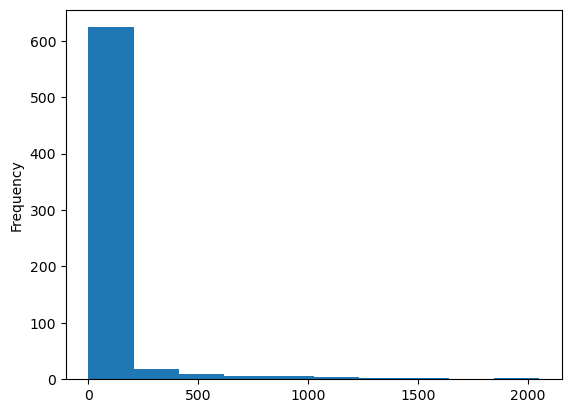

In [8]:
airbnb['price'].value_counts().plot.hist()

<Axes: >

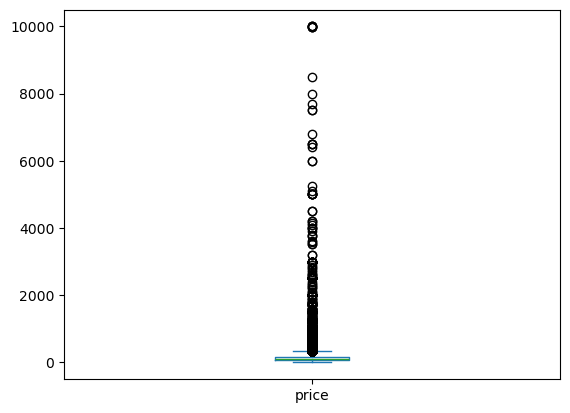

In [9]:
airbnb['price'].plot.box()

In [10]:
def price_categorization(row):
   
    if row <= 50:
        return 'very Low'
    elif row <= 100:
        return 'Low'
    elif row <= 200:
        return 'Medium'
    elif (row <= 250):
        return 'High'
    else:
        return 'very High'

In [11]:
airbnb['price_categories'] = airbnb.price.map(price_categorization)
airbnb['price_categories']

0          Medium
1            High
2          Medium
3             Low
4             Low
           ...   
48890         Low
48891    very Low
48892      Medium
48893         Low
48894         Low
Name: price_categories, Length: 48895, dtype: object

In [12]:
airbnb['price_categories'].value_counts()

price_categories
Low          17367
Medium       16583
very Low      6561
very High     5208
High          3176
Name: count, dtype: int64

### 2.2  Categorization of the "minimum_nights" column into 5 groups

In [13]:
airbnb['minimum_nights'].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

<Axes: >

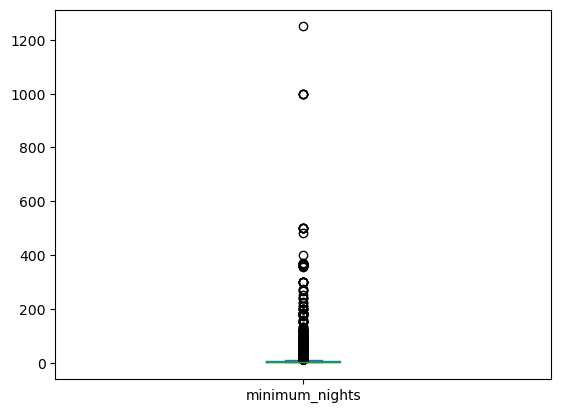

In [14]:
airbnb['minimum_nights'].plot.box()

In [15]:
def minimum_night_categorization(row):
  
    if row <= 1:
        return 'very Low'
    elif row <= 3:
        return 'Low'
    elif row <= 5 :
        return 'Medium'
    elif (row <= 7):
        return 'High'
    else:
        return 'very High'

In [16]:
airbnb['minimum_night_categories'] = airbnb.minimum_nights.map(minimum_night_categorization)
airbnb['minimum_night_categories']

0         very Low
1         very Low
2              Low
3         very Low
4        very High
           ...    
48890          Low
48891       Medium
48892    very High
48893     very Low
48894         High
Name: minimum_night_categories, Length: 48895, dtype: object

In [17]:
airbnb['minimum_night_categories'].value_counts()

minimum_night_categories
Low          19695
very Low     12720
very High     7333
Medium        6337
High          2810
Name: count, dtype: int64

### 2.3 Categorization of the "number_of_reviews" column into 5 groups

In [18]:
airbnb['number_of_reviews'].describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

<Axes: >

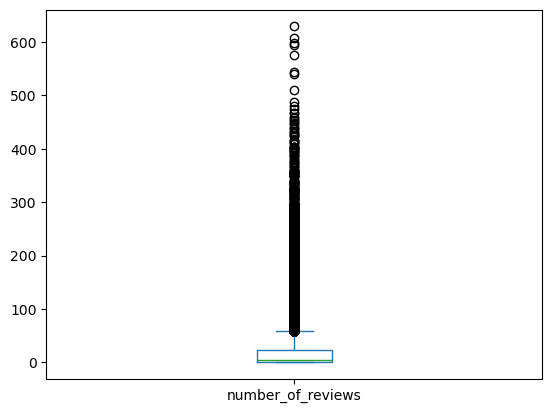

In [19]:
airbnb['number_of_reviews'].plot.box()

In [20]:
def number_of_reviews_categorization(row):
    
    if row <= 1:
        return 'very Low'
    elif row <= 5:
        return 'Low'
    elif row <= 10 :
        return 'Medium'
    elif (row <= 30):
        return 'High'
    else:
        return 'very High'

In [21]:
airbnb['number_of_reviews_categories'] = airbnb.number_of_reviews.map(number_of_reviews_categorization)
airbnb['number_of_reviews_categories']

0           Medium
1        very High
2         very Low
3        very High
4           Medium
           ...    
48890     very Low
48891     very Low
48892     very Low
48893     very Low
48894     very Low
Name: number_of_reviews_categories, Length: 48895, dtype: object

In [22]:
airbnb['number_of_reviews_categories'].value_counts()

number_of_reviews_categories
very Low     15296
very High    10336
Low           9597
High          8236
Medium        5430
Name: count, dtype: int64

### 2.4 Categorization of the "availability_365" column into 5 groups

In [23]:
airbnb['availability_365'].describe()

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

<Axes: >

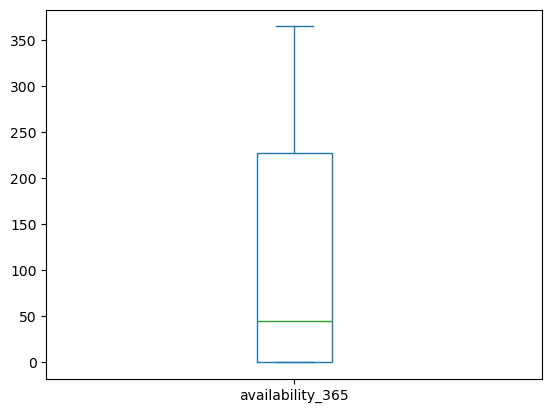

In [24]:
airbnb['availability_365'].plot.box()

In [25]:
def availability_365_categorization(row):
    
    if row <= 1:
        return 'very Low'
    elif row <= 100:
        return 'Low'
    elif row <= 200 :
        return 'Medium'
    elif (row <= 300):
        return 'High'
    else:
        return 'very High'

In [26]:
airbnb['availability_365_categories'] = airbnb.availability_365.map(availability_365_categorization)
airbnb['availability_365_categories']

0        very High
1        very High
2        very High
3           Medium
4         very Low
           ...    
48890          Low
48891          Low
48892          Low
48893          Low
48894          Low
Name: availability_365_categories, Length: 48895, dtype: object

In [27]:
airbnb['availability_365_categories'].value_counts()

availability_365_categories
very Low     17941
Low          11829
very High     8108
Medium        5792
High          5225
Name: count, dtype: int64

## 3. Fixing columns and reviewing data types

In [28]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Note: we observed that the data type of last_review column is object that needs to be converted into datetime format for our analysis

In [29]:
airbnb.last_review = pd.to_datetime(airbnb.last_review) 
airbnb.last_review

0       2018-10-19
1       2019-05-21
2              NaT
3       2019-07-05
4       2018-11-19
           ...    
48890          NaT
48891          NaT
48892          NaT
48893          NaT
48894          NaT
Name: last_review, Length: 48895, dtype: datetime64[ns]

In [30]:
airbnb.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
price_categories                          object
minimum_night_categories                  object
number_of_reviews_categories              object
availability_365_categories               object
dtype: object

#### Note: The data type of the last_review column has been changed from object to datetime format. All the other columns have appropriate data types , so we don't need any further modification.

## 4. Variable Categories

### 4.1 Numerical variables

In [31]:
column_list= airbnb.columns.tolist()
print(column_list,end=" ")

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'price_categories', 'minimum_night_categories', 'number_of_reviews_categories', 'availability_365_categories'] 

In [32]:
num_cols = airbnb.columns[[9,10,11,13,14,15]]
num_cols

Index(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'], dtype='object')

In [33]:
airbnb[num_cols].describe()             

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### 4.2 Categorical variable 

In [34]:
cat_cols = airbnb.columns[[0,1,3,4,5,8,16,17,18,19]]
cat_cols

Index(['id', 'name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price_categories', 'minimum_night_categories', 'number_of_reviews_categories', 'availability_365_categories'], dtype='object')

In [35]:
airbnb[cat_cols].head(3)             

,id,name,host_name,neighbourhood_group,neighbourhood,room_type,price_categories,minimum_night_categories,number_of_reviews_categories,availability_365_categories
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,Medium,very Low,Medium,very High
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,High,very Low,very High,very High
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,Medium,Low,very Low,very High


 ### 4.3 Location variable

In [36]:
location = airbnb.columns[[5,6,7]]
airbnb[location].head()

,neighbourhood,latitude,longitude
0,Kensington,40.64749,-73.97237
1,Midtown,40.75362,-73.98377
2,Harlem,40.80902,-73.94190
3,Clinton Hill,40.68514,-73.95976
4,East Harlem,40.79851,-73.94399


 ### 4.4 Date variable

In [37]:
Date =airbnb.columns[[12]]
airbnb[Date].head()

,last_review
0,2018-10-19
1,2019-05-21
2,NaT
3,2019-07-05
4,2018-11-19


## 5. Missing values


In [38]:
airbnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price_categories                      0
minimum_night_categories              0
number_of_reviews_categories          0
availability_365_categories           0
dtype: int64

In [39]:
missing_perc=round(airbnb.isna().sum()/len(airbnb)*100,2)
missing_perc.sort_values(ascending=False)

reviews_per_month                 20.56
last_review                       20.56
host_name                          0.04
name                               0.03
id                                 0.00
number_of_reviews                  0.00
number_of_reviews_categories       0.00
minimum_night_categories           0.00
price_categories                   0.00
availability_365                   0.00
calculated_host_listings_count     0.00
minimum_nights                     0.00
price                              0.00
room_type                          0.00
longitude                          0.00
latitude                           0.00
neighbourhood                      0.00
neighbourhood_group                0.00
host_id                            0.00
availability_365_categories        0.00
dtype: float64

## Observations :

#### The dataset contains two columns, 'last_review' and 'reviews_per_month,' which exhibit approximately 20.56% missing values.  Additionally, the 'name' and 'host_name' columns have 0.3% and 0.4% missing values, respectively.

#### Our objective is to determine whether these missing values are MCAR (Missing Completely at Random) or MNAR (Missing Not at Random). The former implies that the absence of data is not related to any other features, while the latter indicates a specific reason behind the missing data

#### It is imperative to highlight that we will neither drop nor impute any columns, as our primary focus is on analyzing the dataset rather than constructing a model. Additionally, the majority of the features hold significant importance for our analysis.


## 5.1 Missing values Analysis - last_review

In [40]:
# Selecting the data with missing values for 'last_review' Attribute
airbnb_1 = airbnb.loc[airbnb.last_review.isnull(),:]
airbnb_1.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_categories,minimum_night_categories,number_of_reviews_categories,availability_365_categories
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,Medium,Low,very Low,very High
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,249,Medium,High,very Low,High
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0,Low,Medium,very Low,very Low


## 5.2 Missing values Analysis ('last_review' vs 'neighbourhood_group')

In [41]:
# identifying the Count of'neighbourhood_group' with missing values using newly created dataframe
airbnb_1.groupby('neighbourhood_group').neighbourhood_group.count() 

neighbourhood_group
Bronx             215
Brooklyn         3657
Manhattan        5029
Queens           1092
Staten Island      59
Name: neighbourhood_group, dtype: int64

In [42]:
# identifying the Count of 'neighbourhood_group' using original dataframe
airbnb.groupby('neighbourhood_group').neighbourhood_group.count()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [43]:
(airbnb_1.groupby('neighbourhood_group').neighbourhood_group.count()/airbnb.groupby('neighbourhood_group').neighbourhood_group.count())*100

neighbourhood_group
Bronx            19.706691
Brooklyn         18.190410
Manhattan        23.216841
Queens           19.272856
Staten Island    15.817694
Name: neighbourhood_group, dtype: float64

<Axes: xlabel='neighbourhood_group'>

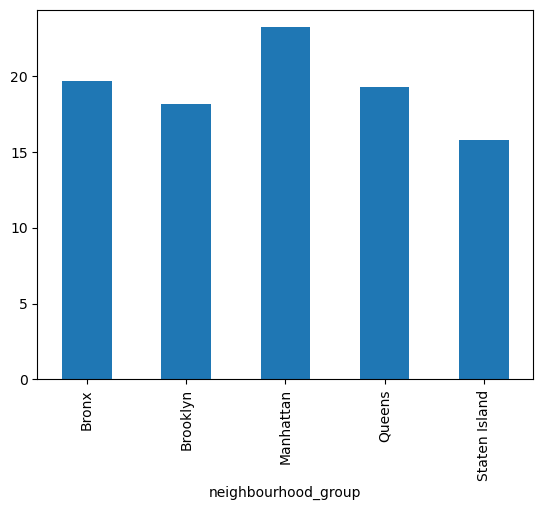

In [44]:
((airbnb_1.groupby('neighbourhood_group').neighbourhood_group.count()/airbnb.groupby('neighbourhood_group').neighbourhood_group.count())*100).plot.bar()

#### We have got missing values for each neighbourhood_group, We'll have to find mean missing value for neighbourhood_group

In [45]:
((airbnb_1.groupby('neighbourhood_group').neighbourhood_group.count()/airbnb.groupby('neighbourhood_group').neighbourhood_group.count())*100).mean()

19.240898461107257

#### - We found that the  'neighbourhood_group' has approximately 19.2 %  missing values with respect to the  'last_review' Attribute and Manhattan has highest missing value 23.2 %

### 5.3 Missing values Analysis ('last_review vs 'room_type')

In [46]:
# identifying the Count of'room_type' with missing values using newly created dataframe
airbnb_1.groupby('room_type').room_type.count() 

room_type
Entire home/apt    5077
Private room       4661
Shared room         314
Name: room_type, dtype: int64

In [47]:
# identifying the Count of 'room_type' using original dataframe
airbnb.groupby('room_type').room_type.count()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [48]:
airbnb_1.groupby('room_type').room_type.count()/airbnb.groupby('room_type').room_type.count()*100

room_type
Entire home/apt    19.981109
Private room       20.877004
Shared room        27.068966
Name: room_type, dtype: float64

<Axes: xlabel='room_type'>

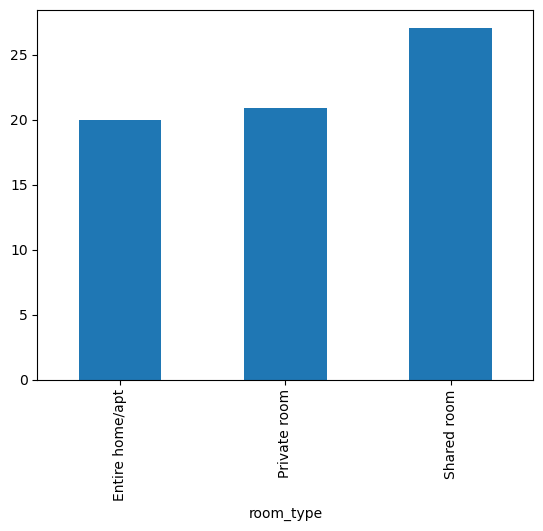

In [49]:
(airbnb_1.groupby('room_type').room_type.count()/airbnb.groupby('room_type').room_type.count()*100).plot.bar()

#### - From the above plot we can see that the missing value percentage is high for shared rooms 27% w.r.t to last_review Attribute 

### 5.4 Missing values Analysis ('price vs 'last_review')

In [50]:
## To get the Mean and Median of prices w.r.t missing values in the last_review attribute.

print('Mean   = ', airbnb[airbnb['last_review'].isnull()].price.mean())
print('Median = ', airbnb[airbnb['last_review'].isnull()].price.median())

Mean   =  192.9190210903303
Median =  120.0


In [51]:
## To get the Mean and Median of prices w.r.t non missing values in the last_review attribute.

print('Mean   = ', airbnb[airbnb['last_review'].notnull()].price.mean())
print('Median = ', airbnb[airbnb['last_review'].notnull()].price.median())

Mean   =  142.317946605566
Median =  101.0


## Observations :

#### 'last_review' attribute is missing is almost same for all the neighbourhood

#### When prices are High, 'last_review' attribues are missing, which implies that if a airbnb property has high cost, reviews are less likely to be given

#### For the shared rooms , 'last_review' missing value percentage is highest 27% , which implies that reviews are less likely to be given for shared rooms

## 6. Univariate Analysis

In [52]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_categories,minimum_night_categories,number_of_reviews_categories,availability_365_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Medium,very Low,Medium,very High
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,High,very Low,very High,very High
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,Medium,Low,very Low,very High
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Low,very Low,very High,Medium
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Low,very High,Medium,very Low


### 6.1 Name of the Airbnb Property 

In [53]:
airbnb.name.value_counts()

name
Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Brownstone garden 2 bedroom duplex, Central Park       1
Bright Cozy Private Room near Columbia Univ            1
1 bdrm/large studio in a great location                1
Cozy Private Room #2 Two Beds Near JFK and J Train     1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: count, Length: 47896, dtype: int64

In [54]:
airbnb.name.value_counts().index[:10]

Index(['Hillside Hotel', 'Home away from home', 'New york Multi-unit building', 'Brooklyn Apartment', 'Loft Suite @ The Box House Hotel', 'Private Room', '#NAME?', 'Artsy Private BR in Fort Greene Cumberland', 'Private room', 'Private room in Williamsburg'], dtype='object', name='name')

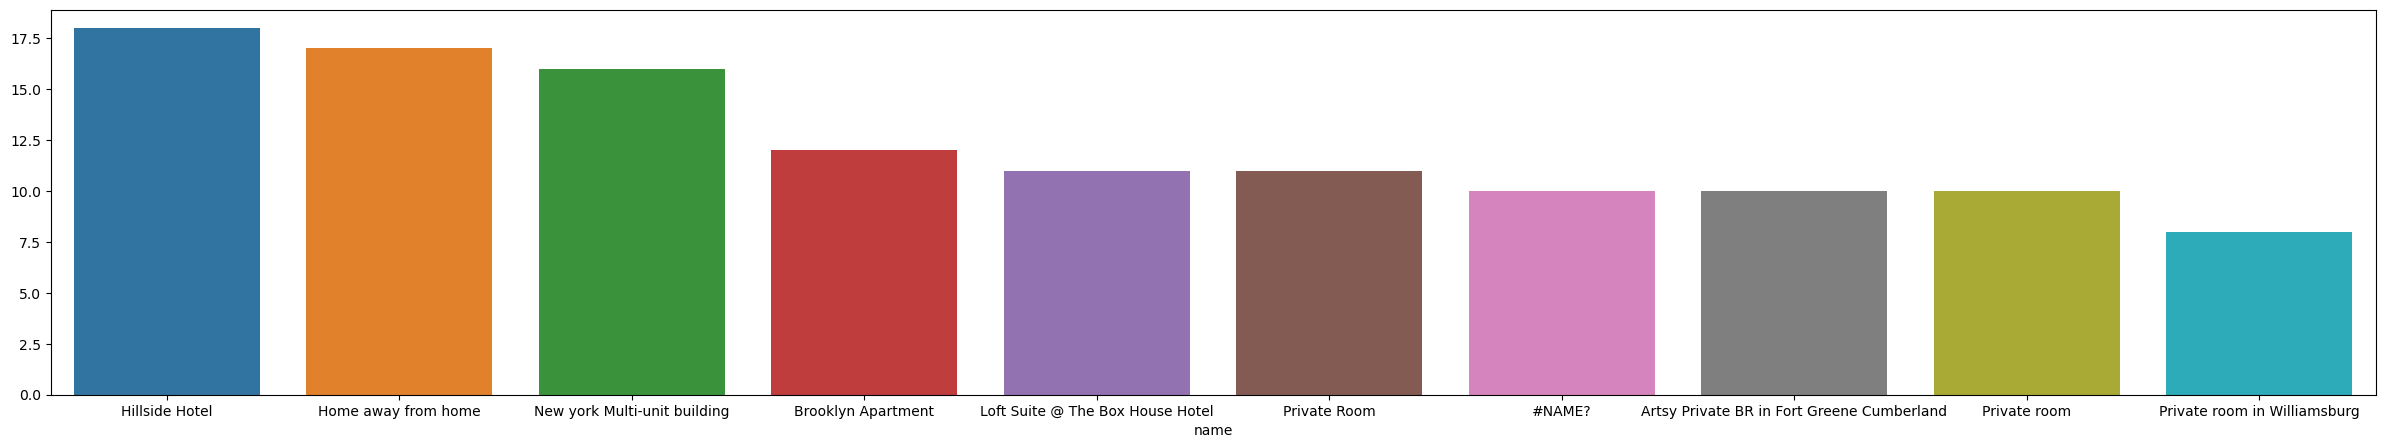

In [55]:
plt.figure(figsize=(30,5))
sns.barplot(x = airbnb.name.value_counts().index[:10] , y = airbnb.name.value_counts().values[:10])
plt.show()

####  Names of top 10 Airbnb property are displayed in above bar graph

### 6.2 host_name of Airbnb Property

In [56]:
airbnb.host_name.value_counts()

host_name
Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: count, Length: 11452, dtype: int64

In [57]:
airbnb.host_name.value_counts().index[0:10]

Index(['Michael', 'David', 'Sonder (NYC)', 'John', 'Alex', 'Blueground', 'Sarah', 'Daniel', 'Jessica', 'Maria'], dtype='object', name='host_name')

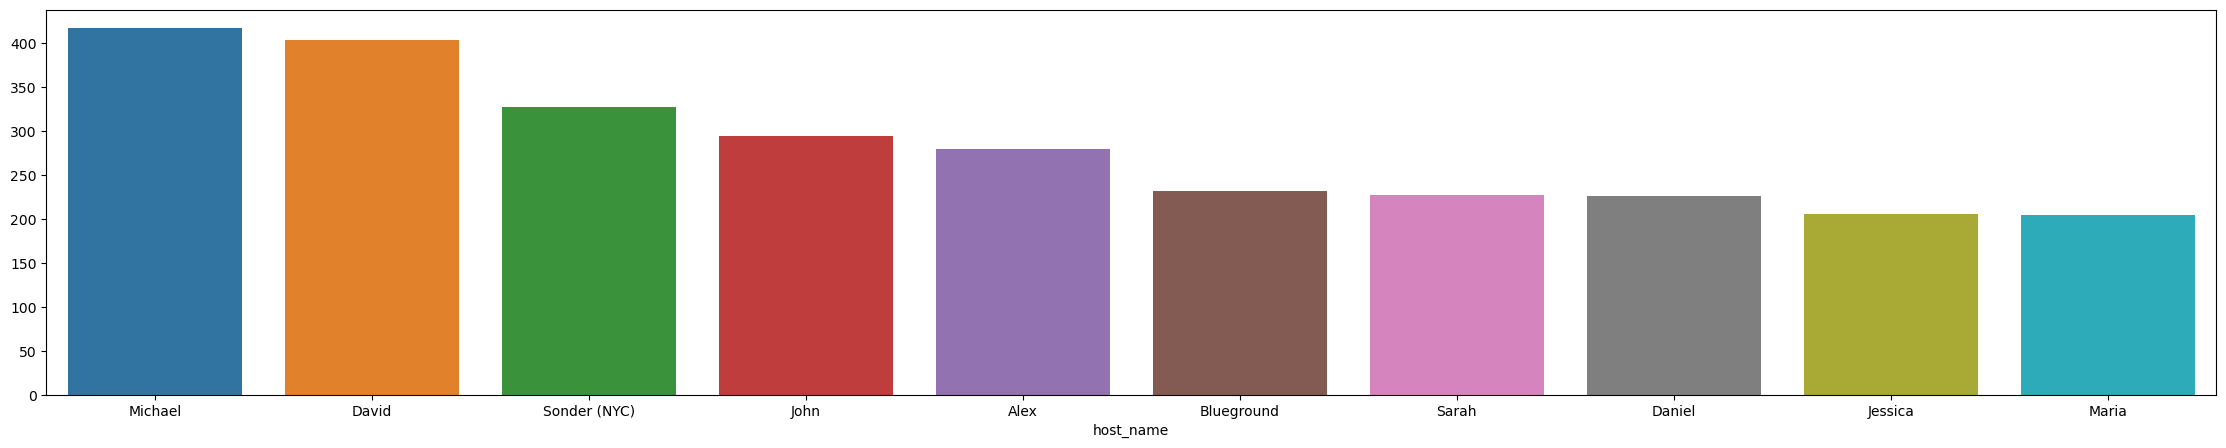

In [58]:
plt.figure(figsize=(28,5))
sns.barplot(x = airbnb.host_name.value_counts().index[:10] , y = airbnb.host_name.value_counts().values[:10])
plt.show()

####  Names of top 10 Airbnb Hosts are displayed in above bar graph

### 6.3 neighbourhood_group in which we have the Airbnb Properties 

In [59]:
airbnb.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [60]:
airbnb.neighbourhood_group.value_counts(normalize= True) * 100

neighbourhood_group
Manhattan        44.301053
Brooklyn         41.116679
Queens           11.588097
Bronx             2.231312
Staten Island     0.762859
Name: proportion, dtype: float64

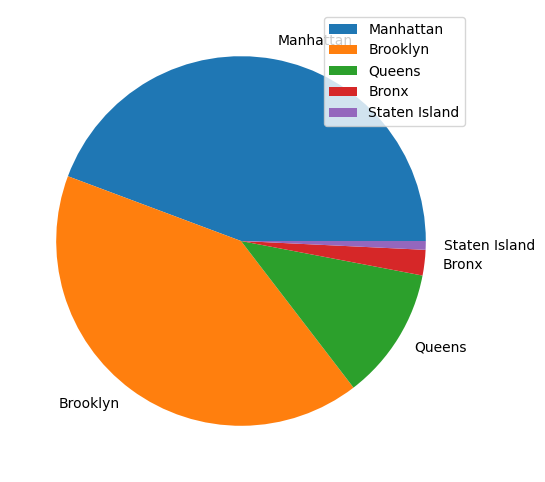

In [61]:
plt.figure(figsize=(8,6))
plt.pie(x = airbnb.neighbourhood_group.value_counts(normalize= True) * 100,labels = airbnb.neighbourhood_group.value_counts(normalize= True).index)
plt.legend()
plt.show()

#### Majority of listing are in Manhattan and Brooklyn neighbourhood groups
#### 44.3 % of listing are in Manhattan and 41.1% listining are in Brooklyn. 

In [62]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_categories,minimum_night_categories,number_of_reviews_categories,availability_365_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Medium,very Low,Medium,very High
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,High,very Low,very High,very High
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,Medium,Low,very Low,very High
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Low,very Low,very High,Medium
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Low,very High,Medium,very Low


### 6.4 neighbourhood

In [63]:
airbnb.neighbourhood.value_counts()

neighbourhood
Williamsburg                  3920
Bedford-Stuyvesant            3714
Harlem                        2658
Bushwick                      2465
Upper West Side               1971
Hell's Kitchen                1958
East Village                  1853
Upper East Side               1798
Crown Heights                 1564
Midtown                       1545
East Harlem                   1117
Greenpoint                    1115
Chelsea                       1113
Lower East Side                911
Astoria                        900
Washington Heights             899
West Village                   768
Financial District             744
Flatbush                       621
Clinton Hill                   572
Long Island City               537
Prospect-Lefferts Gardens      535
Park Slope                     506
East Flatbush                  500
Fort Greene                    489
Murray Hill                    485
Kips Bay                       470
Flushing                       426
Ridgew

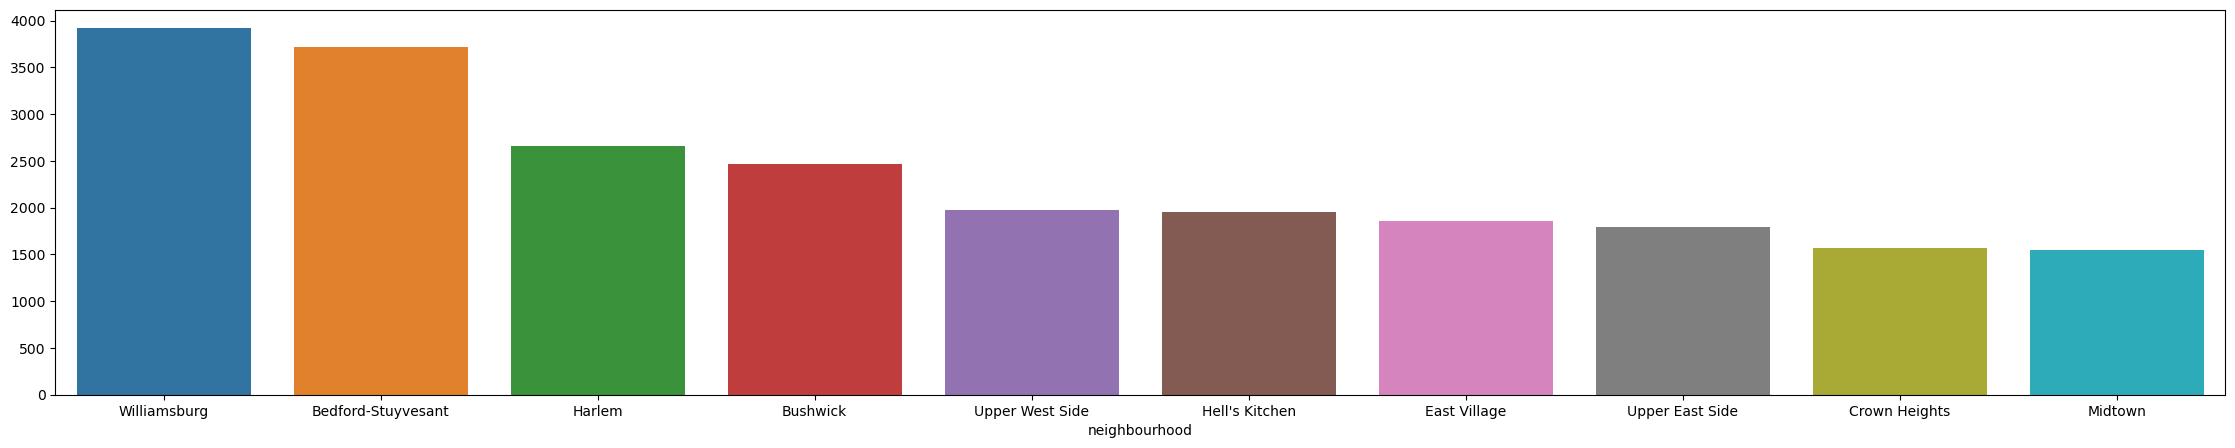

In [64]:
plt.figure(figsize=(28,5))
sns.barplot(x = airbnb.neighbourhood.value_counts().index[:10] , y = airbnb.neighbourhood.value_counts().values[:10])
plt.show()

#### Names of top 10 Neighbourhood are displayed in above bar graph

### 6.5 room_type of in Airbnb

In [65]:
airbnb.room_type.value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [66]:
airbnb.room_type.value_counts(normalize= True) * 100

room_type
Entire home/apt    51.966459
Private room       45.661111
Shared room         2.372431
Name: proportion, dtype: float64

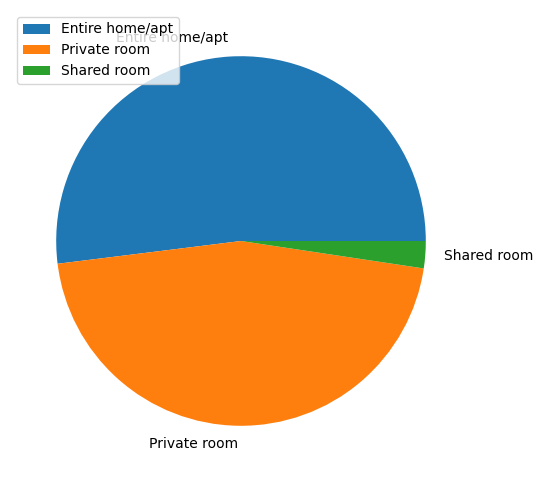

In [67]:
plt.figure(figsize=(8,6))
plt.pie(x = airbnb.room_type.value_counts(normalize= True) * 100,labels = airbnb.room_type.value_counts(normalize= True).index)
plt.legend()
plt.show()

#### Entire home/apt (51.9%) and Private rooms (45.6%)  forms Majority of Listing space type, whereas shared rooms forms only 2.3% of listing space type

### 6.6 price

In [68]:
airbnb.price.value_counts()

price
100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: count, Length: 674, dtype: int64

<Axes: ylabel='Frequency'>

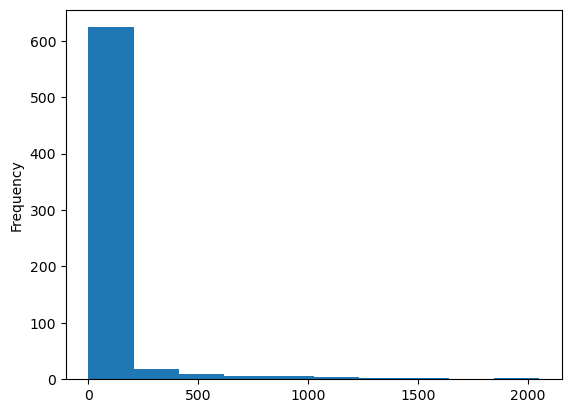

In [69]:
airbnb.price.value_counts().plot.hist()

#### We can observe that majorting of listing is below $500

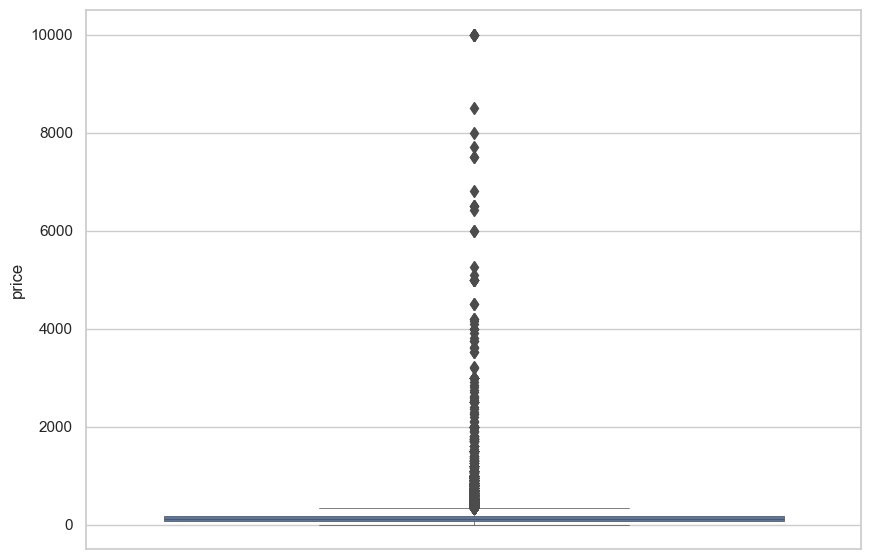

In [70]:
# checking the outliers 

plt.figure(figsize=(10,7))
sns.set_theme(style="whitegrid")
#tips = sns.load_dataset("tips")
sns.boxplot(y = airbnb.price,width=0.8,
    dodge=True,
    fliersize=6,
    linewidth=.5,
    whis=1.5,
    color=None)
plt.show()

### 6.7 minimum_nights

In [71]:
airbnb.minimum_nights.value_counts()

minimum_nights
1       12720
2       11696
3        7999
30       3760
4        3303
5        3034
7        2058
6         752
14        562
10        483
29        340
15        279
20        223
28        203
31        201
21        135
8         130
60        106
90        104
12         91
25         82
9          80
13         54
180        43
11         33
45         32
365        29
120        28
18         28
16         18
27         17
26         16
100        15
35         15
24         14
17         14
50         14
40         13
80          9
19          8
32          8
22          8
23          8
70          8
59          6
300         6
150         6
360         5
500         5
200         4
75          4
55          4
999         3
62          3
91          3
110         3
240         3
93          2
160         2
47          2
88          2
105         2
33          2
53          2
115         2
181         2
210         2
270         2
44          2
133         2
56   

In [72]:
airbnb.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

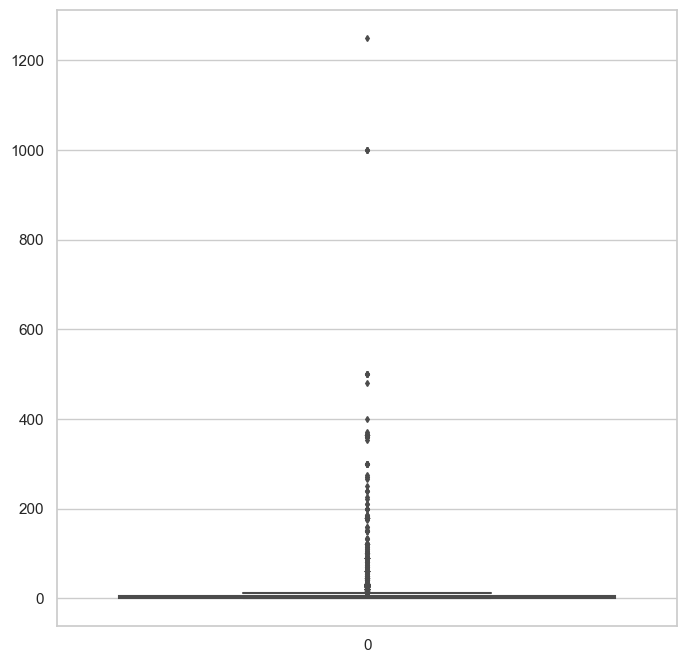

In [73]:
plt.figure(figsize=(8,8))
sns.boxplot(data = airbnb.minimum_nights,fliersize=3)
plt.show()

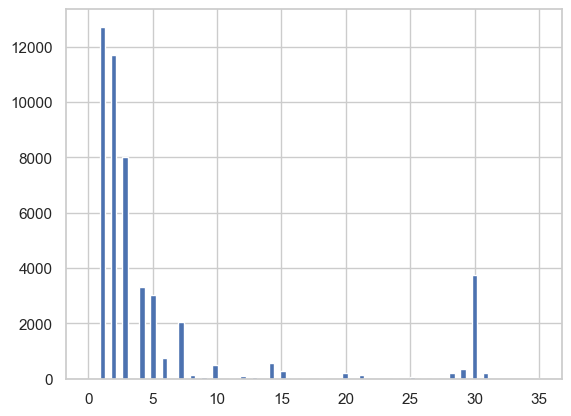

In [74]:
plt.hist(data = airbnb, x = 'minimum_nights',bins=80,range=(0,35))
plt.show()

#### From above graph we can observe that majority of listing has minimun nights to be from 1 night to 5 nights.

#### We also observe a significant number of listing with minimum 30 nights ( monthly booking)

### 6.8 number_of_reviews

In [75]:
airbnb.number_of_reviews.value_counts()

number_of_reviews
0      10052
1       5244
2       3465
3       2520
4       1994
5       1618
6       1357
7       1179
8       1127
9        964
10       803
11       778
12       682
13       611
14       575
15       536
16       471
17       461
18       417
19       401
20       391
22       344
23       337
21       333
25       313
24       305
26       299
28       258
27       253
29       244
32       243
30       227
31       223
33       209
38       205
35       196
34       193
42       192
36       192
37       188
39       167
45       158
41       155
43       154
51       143
48       139
52       137
40       134
49       133
59       131
47       129
54       127
46       124
50       122
44       121
57       111
55       109
58       107
53       106
68       105
62       102
61        99
67        98
70        98
56        98
63        93
64        93
60        92
77        91
72        89
66        85
75        80
73        79
76        79
69        79
74     

In [76]:
airbnb.number_of_reviews.describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

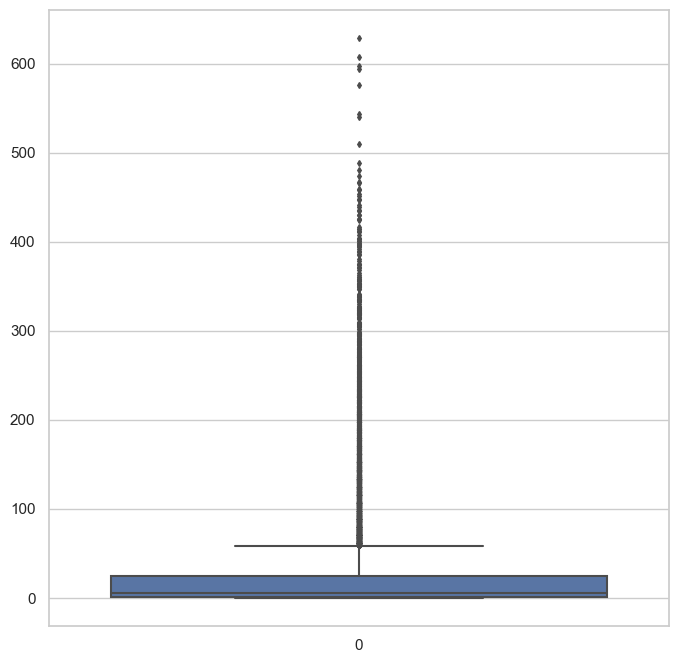

In [77]:
plt.figure(figsize=(8,8))
sns.boxplot(data = airbnb.number_of_reviews,fliersize=3)
plt.show()

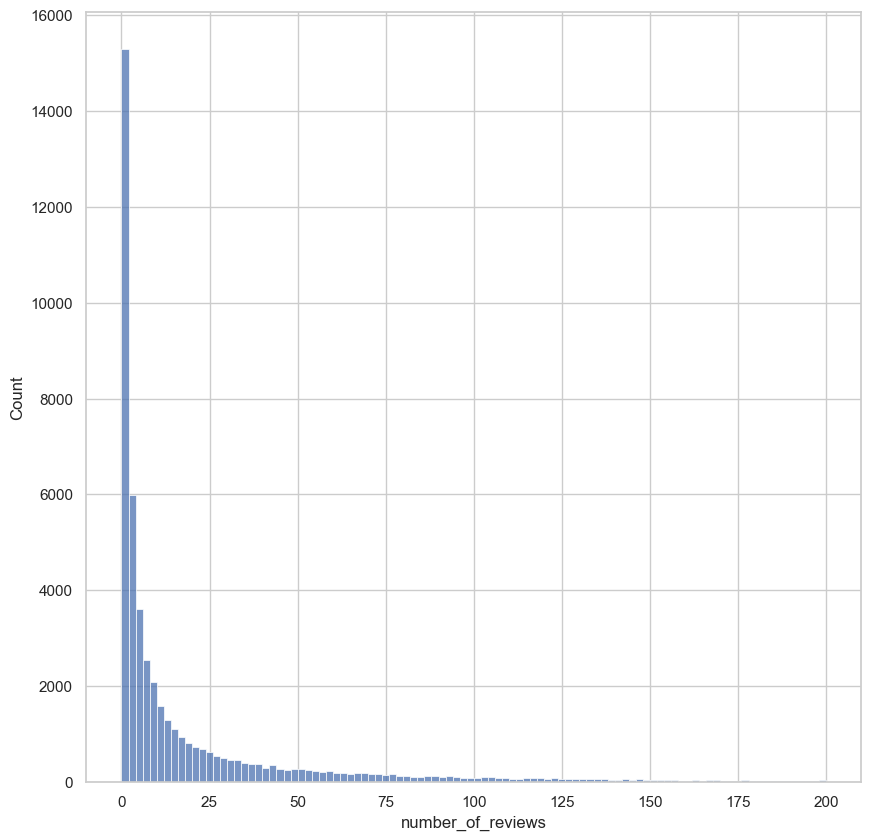

In [78]:
plt.figure(figsize = (10,10))
sns.histplot(data = airbnb, x = 'number_of_reviews',bins=100,binrange=(0,200))
plt.show()

#### We can observe that majority of listing have number of reviews are less than 5. 

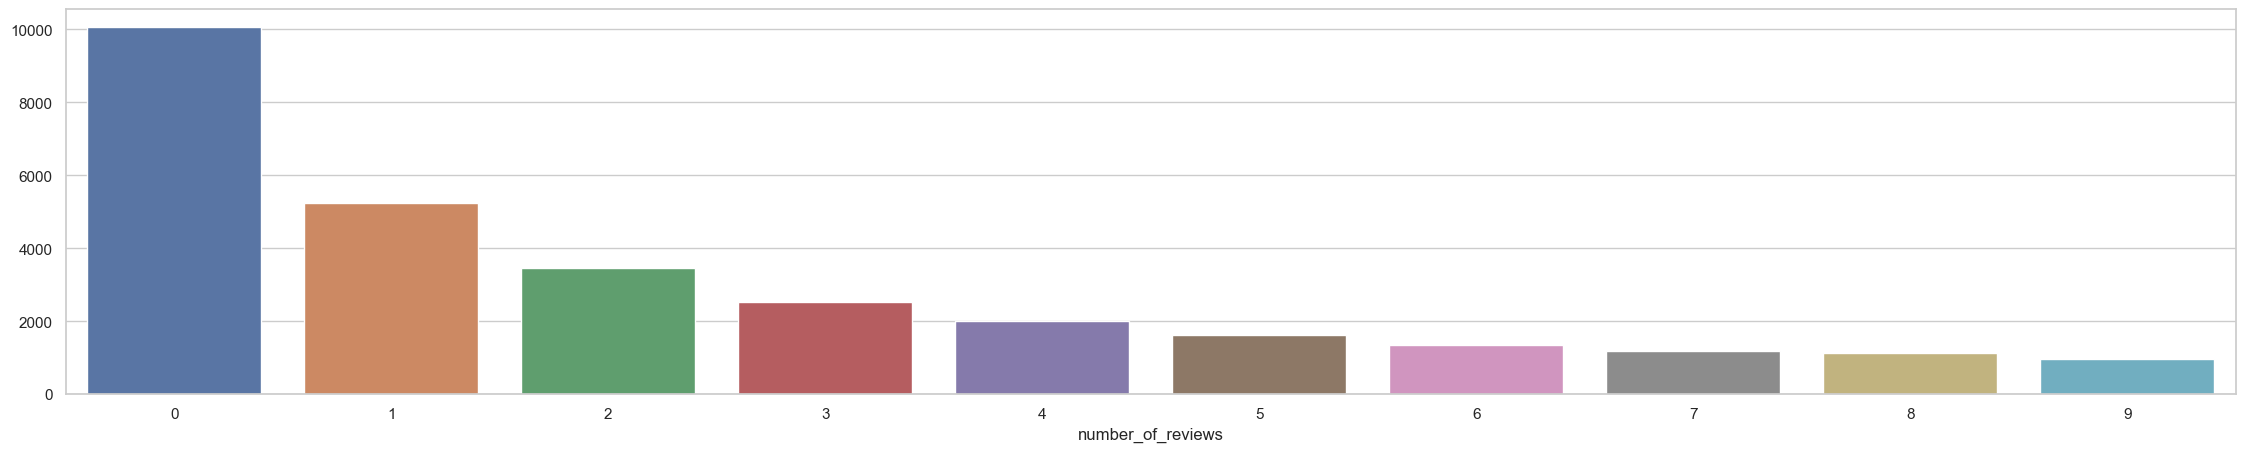

In [79]:
plt.figure(figsize=(28,5))
sns.barplot(x = airbnb.number_of_reviews.value_counts().index[:10] , y = airbnb.number_of_reviews.value_counts().values[:10])
plt.show()

### 6.9 reviews_per_month

In [80]:
airbnb.reviews_per_month.value_counts()

reviews_per_month
0.02     919
0.05     893
1.00     893
0.03     804
0.16     667
        ... 
9.53       1
9.74       1
6.06       1
8.25       1
10.54      1
Name: count, Length: 937, dtype: int64

In [81]:
airbnb.reviews_per_month.describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

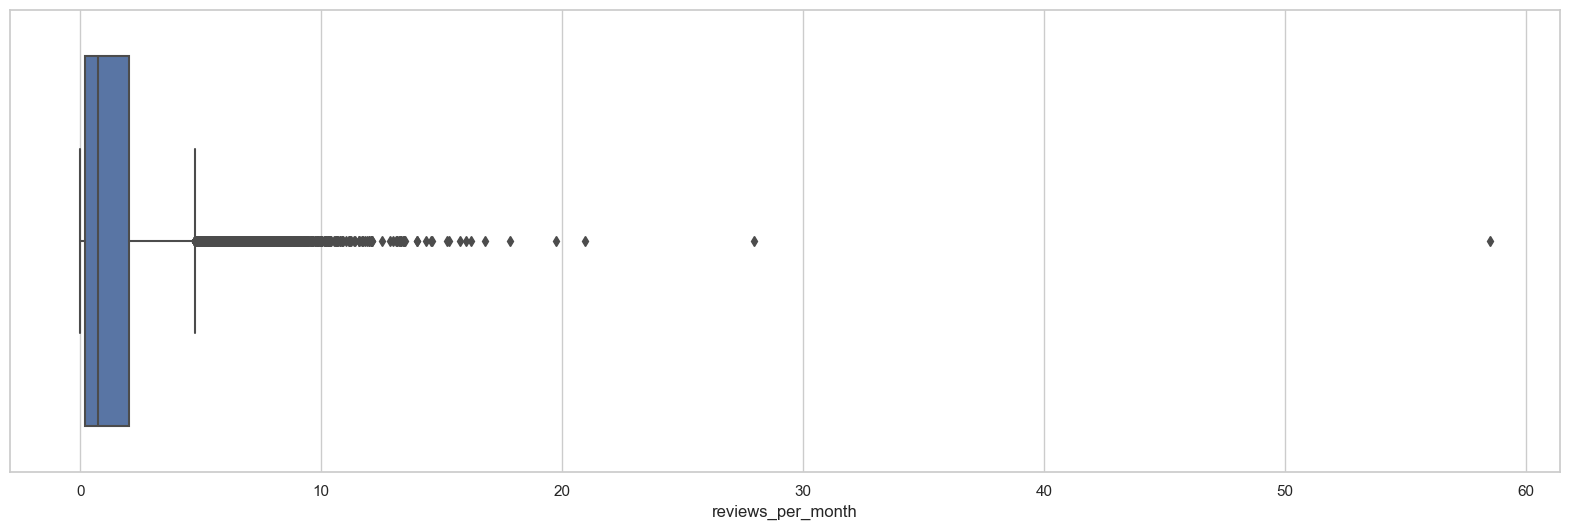

In [82]:
plt.figure(figsize = (20,6))
sns.boxplot(data = airbnb , x = 'reviews_per_month')
plt.show()

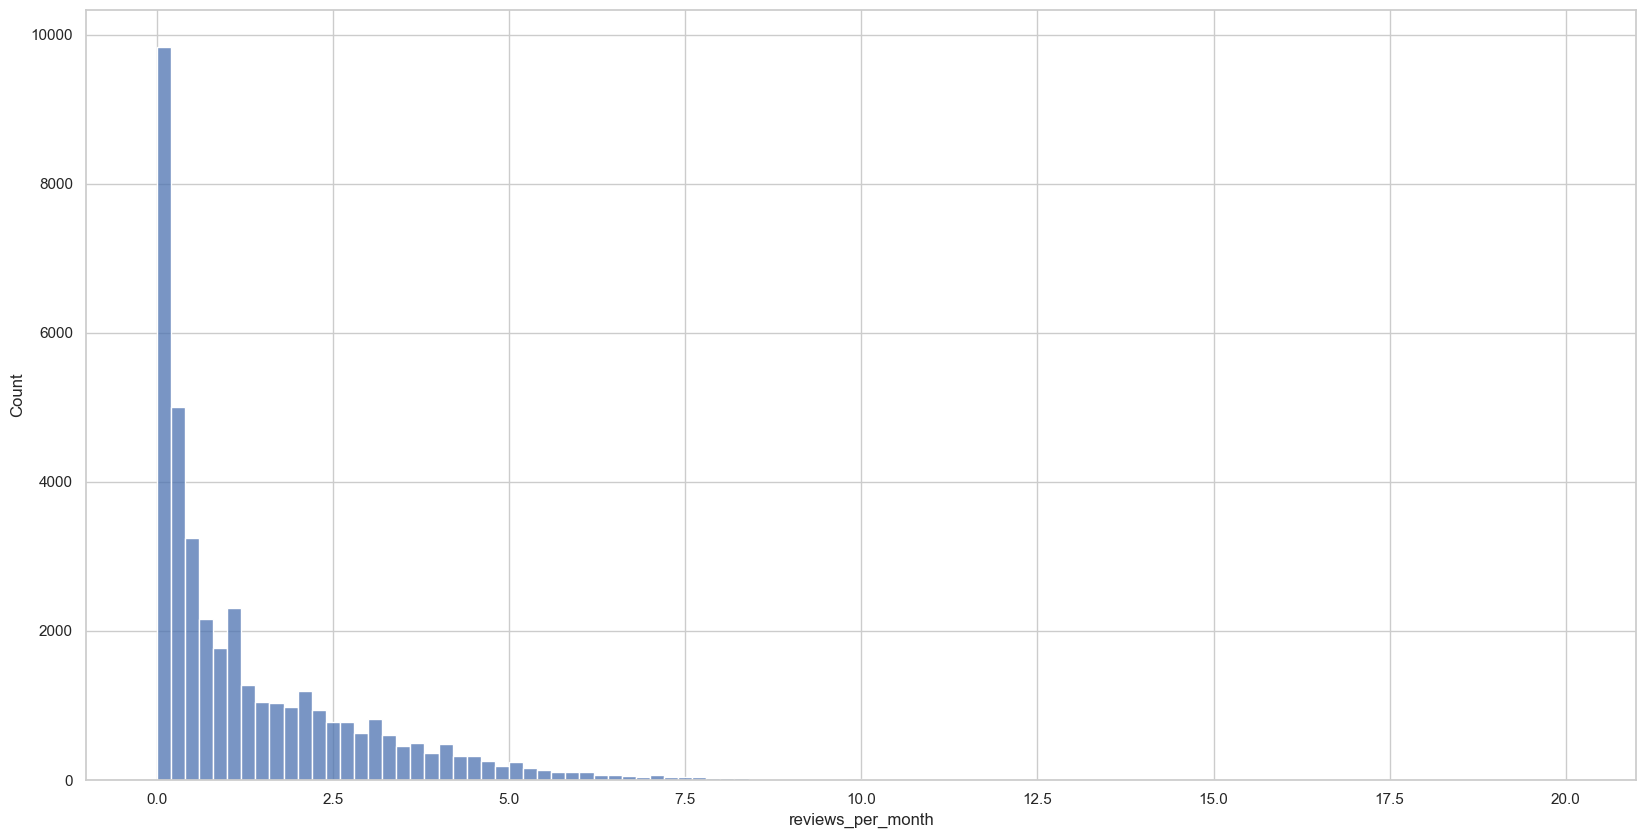

In [83]:
plt.figure(figsize = (20,10))
sns.histplot(data = airbnb, x = 'reviews_per_month',bins=100,binrange=(0,20))
plt.show()

#### majority of listing receives 0 to 1 reviews per month. 

### 6.10 calculated_host_listings_count

In [84]:
airbnb.calculated_host_listings_count.describe()

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

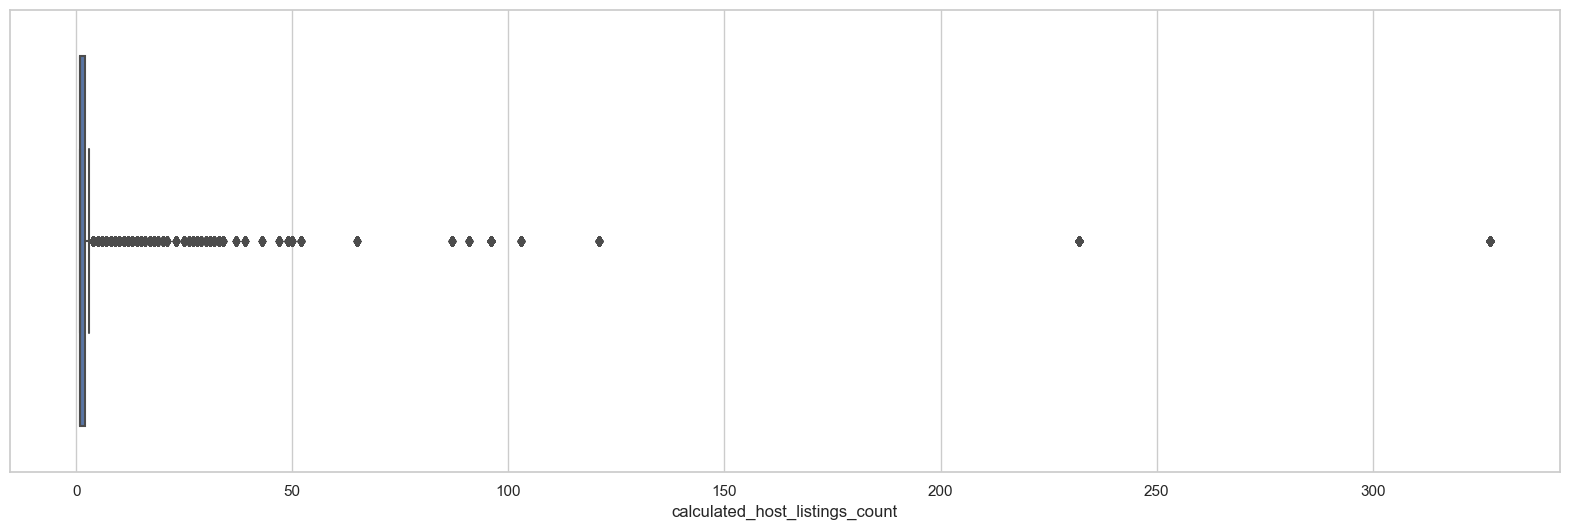

In [85]:
plt.figure(figsize = (20,6))
sns.boxplot(data = airbnb , x = 'calculated_host_listings_count')
plt.show()

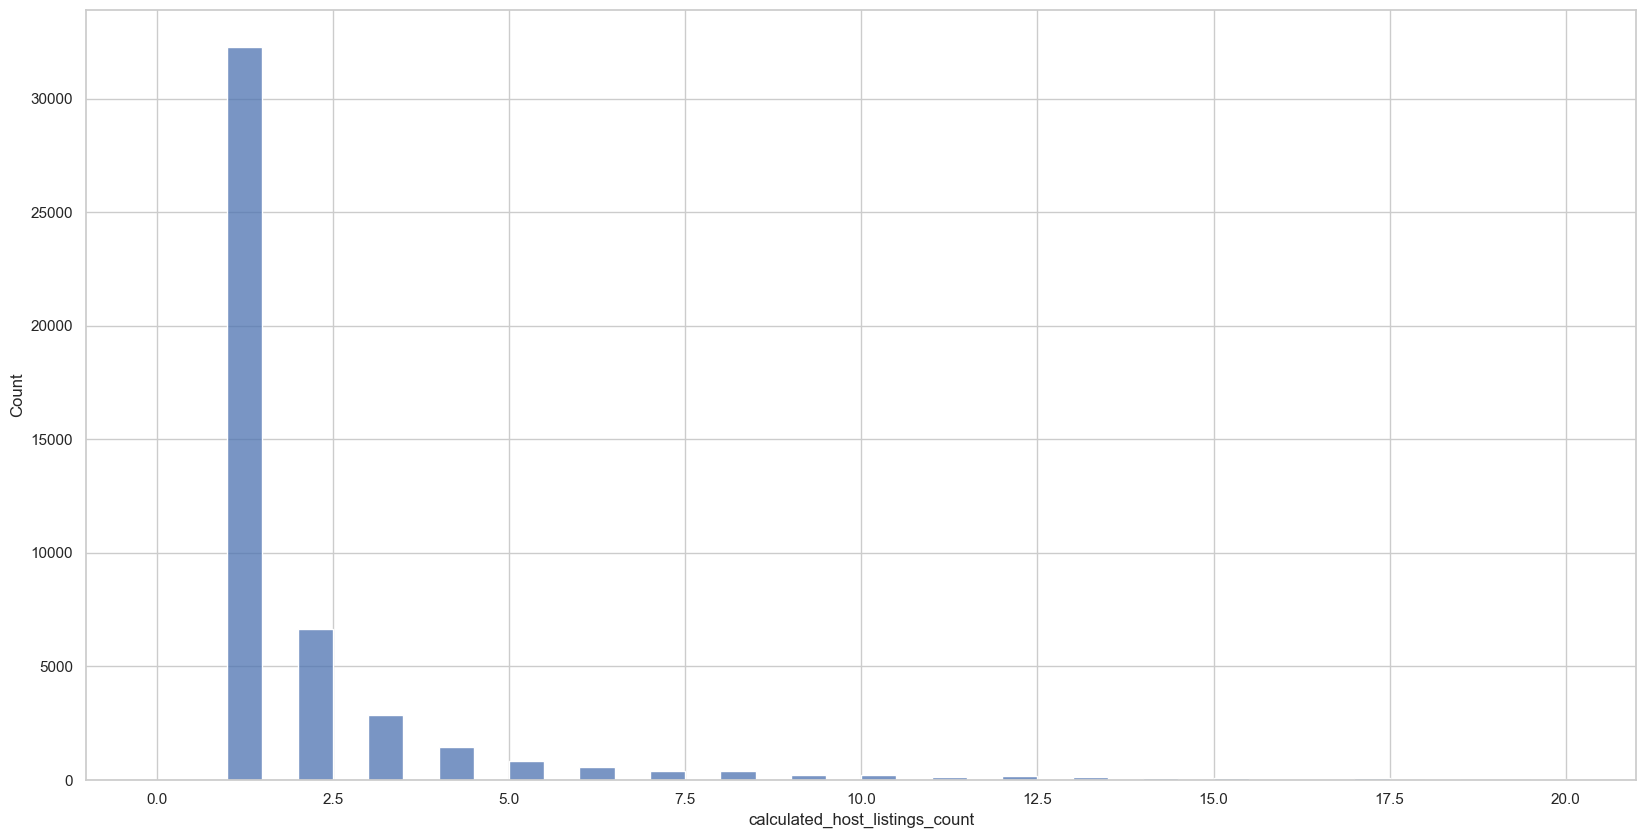

In [86]:
plt.figure(figsize = (20,10))
sns.histplot(data = airbnb, x = 'calculated_host_listings_count',bins=40,binrange=(0,20))
plt.show()

#### Majority of hosts have listing_count = 1

### 6.11 availability_365

In [87]:
airbnb.availability_365.value_counts()

availability_365
0      17533
365     1295
364      491
1        408
89       361
5        340
3        306
179      301
90       290
2        270
6        245
363      239
8        233
4        233
342      230
188      225
7        219
88       200
311      199
341      199
9        193
180      192
83       183
358      180
14       173
11       173
12       172
332      171
35       168
362      166
10       165
13       162
15       159
189      157
310      156
333      154
16       151
87       150
66       143
36       141
23       135
359      135
19       135
20       134
157      134
343      134
34       134
24       131
32       130
17       130
22       129
21       128
31       127
38       125
18       125
281      123
177      120
37       119
249      118
280      114
64       113
29       113
67       112
361      111
43       111
345      111
331      110
81       110
339      109
84       108
30       108
28       108
347      105
173      105
325      104
156     

In [88]:
airbnb.availability_365.describe()

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

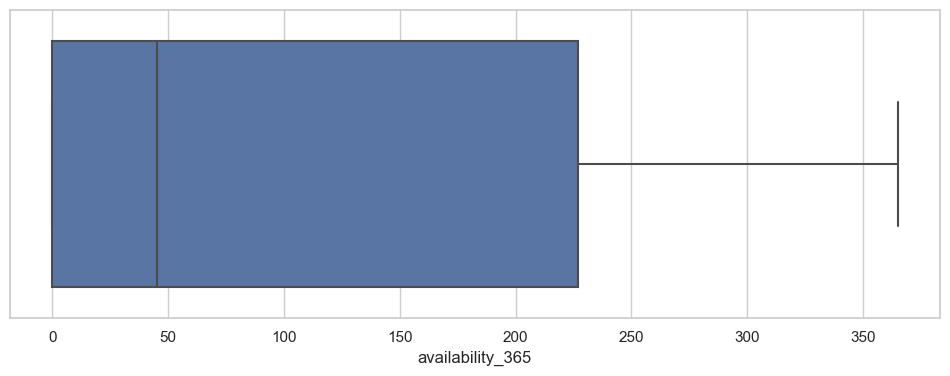

In [89]:
plt.figure(figsize = (12,4))
sns.boxplot(data = airbnb , x = 'availability_365')
plt.show()

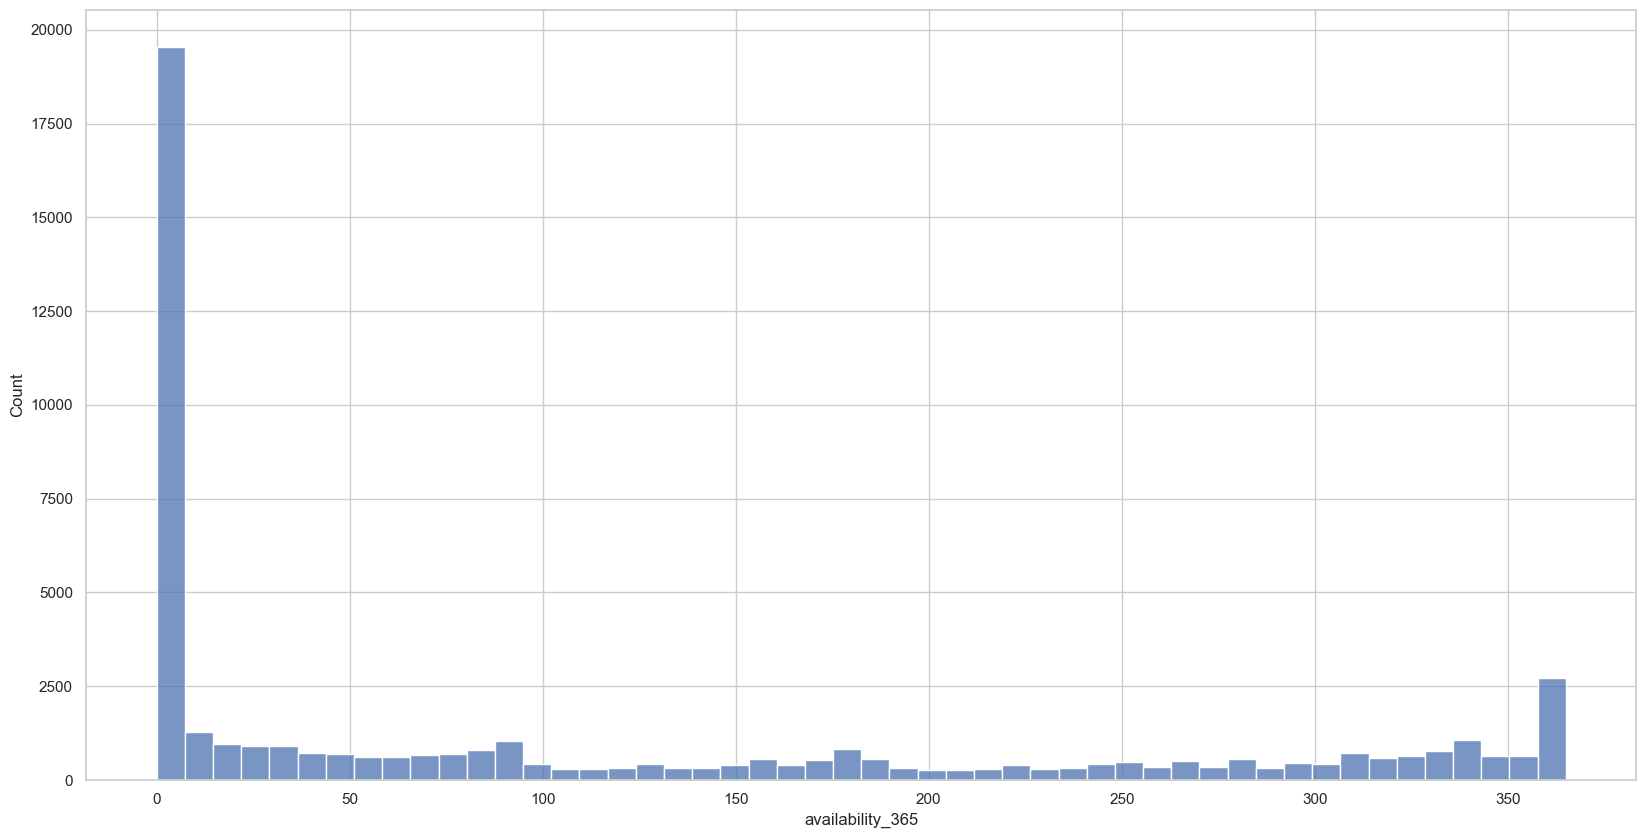

In [90]:
# plotting the histogram

plt.figure(figsize = (20,10))
sns.histplot(data = airbnb, x = 'availability_365',bins=50,binrange=(0,365))
plt.show()

#### Since we are interested in number of days when the listing is available for booking. We can eliminate all the listing that avaliablity_360 = 0

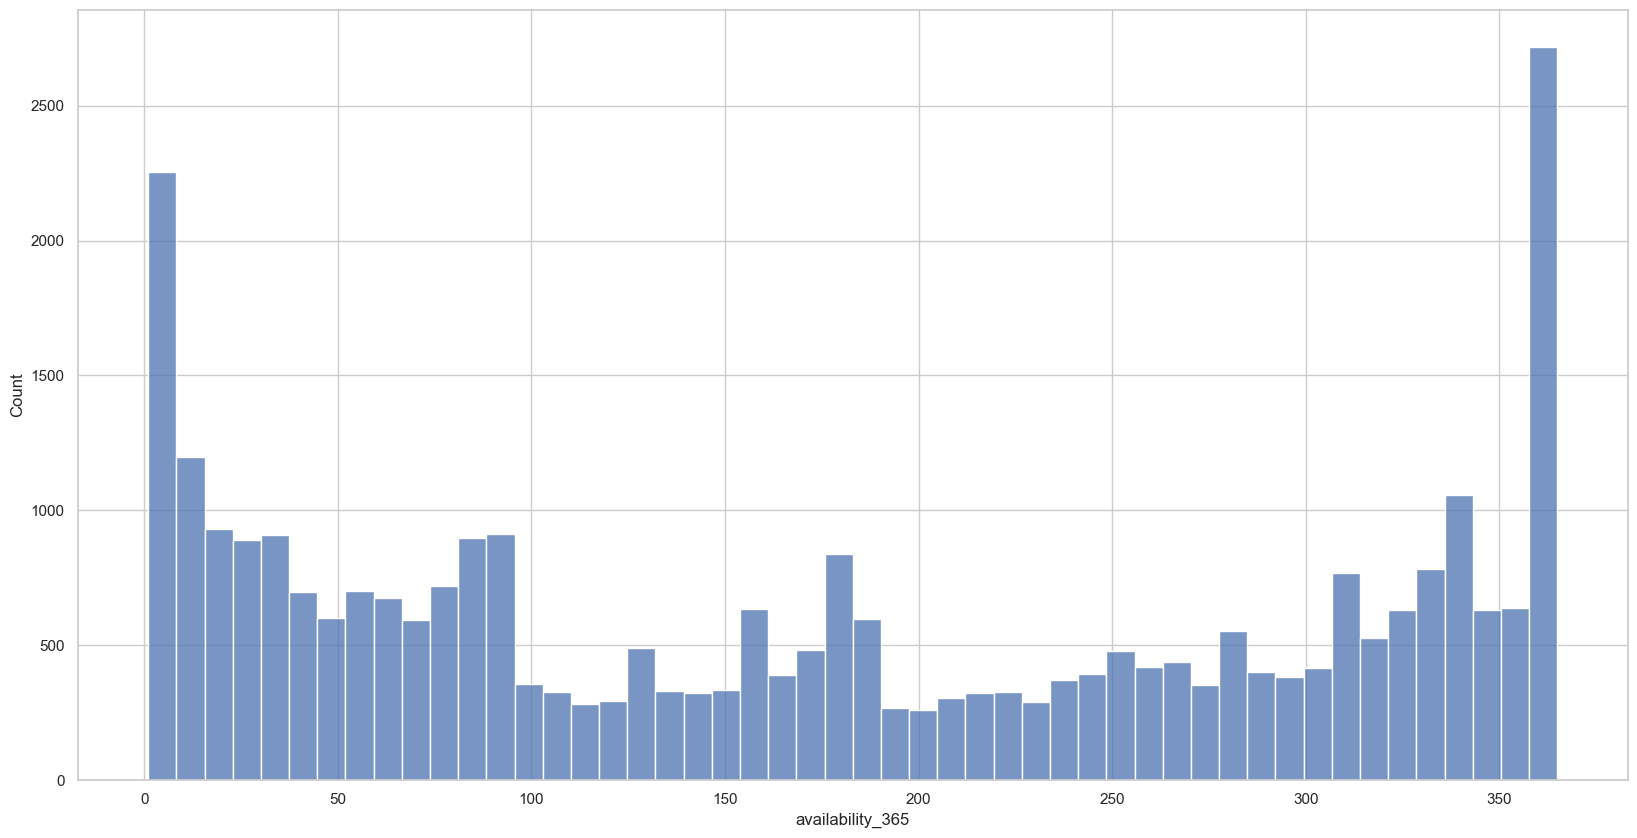

In [91]:
plt.figure(figsize = (20,10))
sns.histplot(data = airbnb, x = 'availability_365',bins=50,binrange=(1,365))
plt.show()

#### Most of the listing are availale 365 days for booking 

### 6.12 minimum_night_categories

In [92]:
airbnb.minimum_night_categories.value_counts()

minimum_night_categories
Low          19695
very Low     12720
very High     7333
Medium        6337
High          2810
Name: count, dtype: int64

In [93]:
airbnb.minimum_night_categories.value_counts(normalize= True)*100

minimum_night_categories
Low          40.280192
very Low     26.014930
very High    14.997444
Medium       12.960425
High          5.747009
Name: proportion, dtype: float64

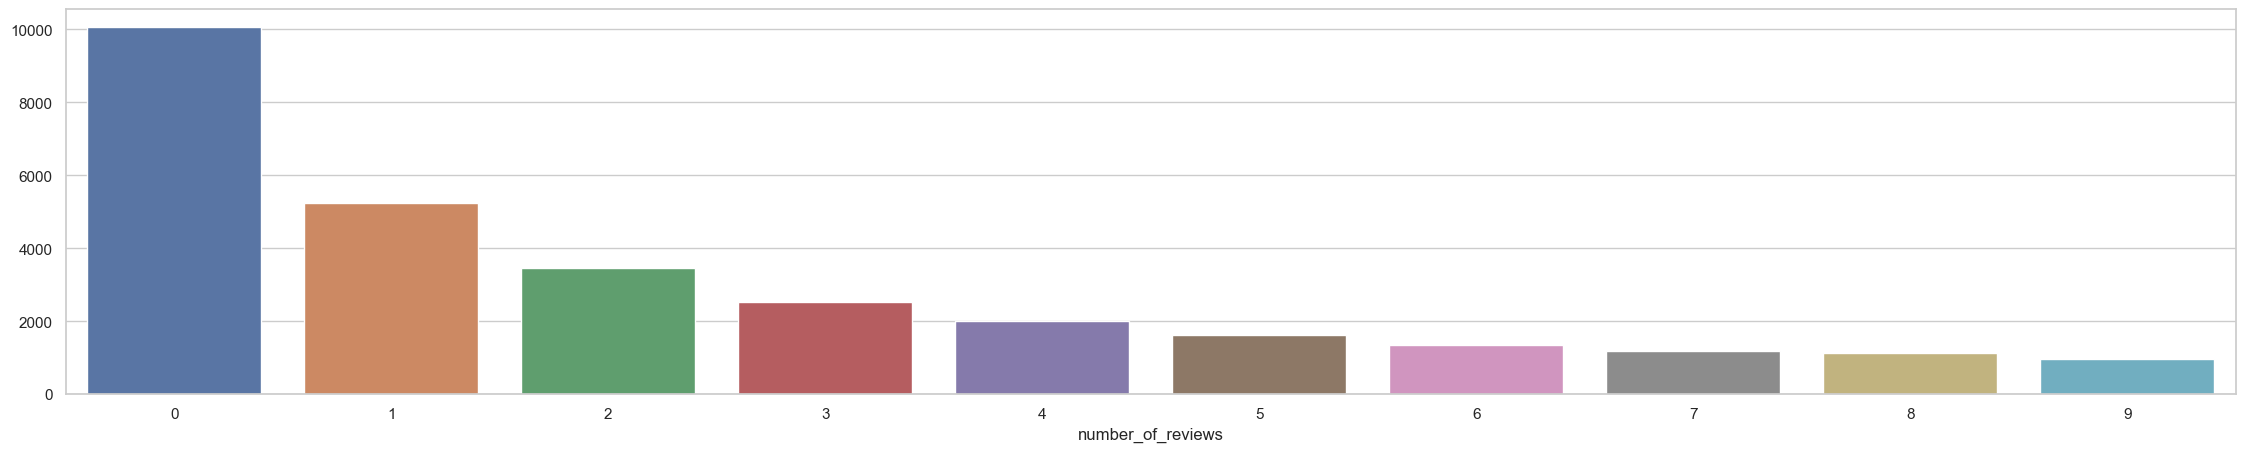

In [94]:
plt.figure(figsize=(28,5))
sns.barplot(x = airbnb.number_of_reviews.value_counts().index[:10] , y = airbnb.number_of_reviews.value_counts().values[:10])
plt.show()

#### Majority of listing has low(less than 1 night) and very low (less3 nights than 3)  minimum nights to be booked. 


### 6.13 number_of_reviews_categories

In [95]:
airbnb.number_of_reviews_categories.value_counts()

number_of_reviews_categories
very Low     15296
very High    10336
Low           9597
High          8236
Medium        5430
Name: count, dtype: int64

In [96]:
airbnb.number_of_reviews_categories.value_counts(normalize=True)*100

number_of_reviews_categories
very Low     31.283362
very High    21.139176
Low          19.627774
High         16.844258
Medium       11.105430
Name: proportion, dtype: float64

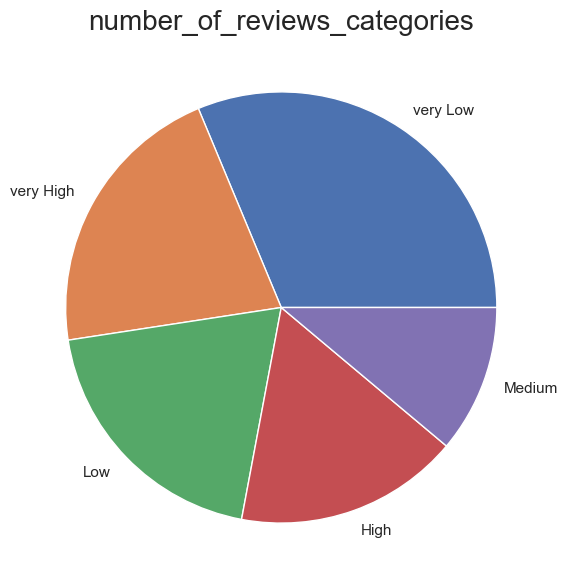

In [97]:
plt.figure(figsize=(12,7))
plt.title('number_of_reviews_categories', fontdict={'fontsize': 20})
plt.pie(x = airbnb.number_of_reviews_categories.value_counts(),labels=airbnb.number_of_reviews_categories.value_counts().index)
plt.show()

#### listings have 31.28 % of very low reviews

### 6.14 price_categories


In [98]:
airbnb.price_categories.value_counts()

price_categories
Low          17367
Medium       16583
very Low      6561
very High     5208
High          3176
Name: count, dtype: int64

In [99]:
airbnb.price_categories.value_counts(normalize=True)*100

price_categories
Low          35.518969
Medium       33.915533
very Low     13.418550
very High    10.651396
High          6.495552
Name: proportion, dtype: float64

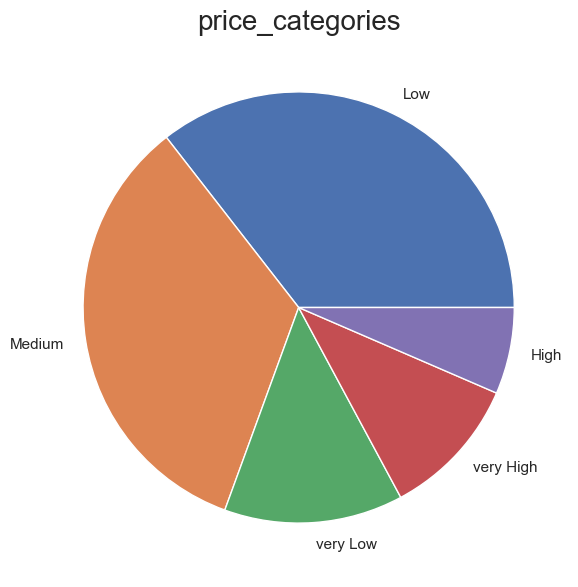

In [100]:
plt.figure(figsize=(12,7))
plt.title('price_categories', fontdict={'fontsize': 20})
plt.pie(x = airbnb.price_categories.value_counts(),labels=airbnb.price_categories.value_counts().index,)
plt.show()

#### Most of the listing falls under Very low and low price categories

## 7. Bivariate and Multivariate Analysis

### 7.1 Finding correlation between numerical columns

In [101]:
airbnb[num_cols].head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,149,1,9,0.21,6,365
1,225,1,45,0.38,2,355
2,150,3,0,NaN,1,365
3,89,1,270,4.64,1,194
4,80,10,9,0.10,1,0


In [102]:
airbnb[num_cols].corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


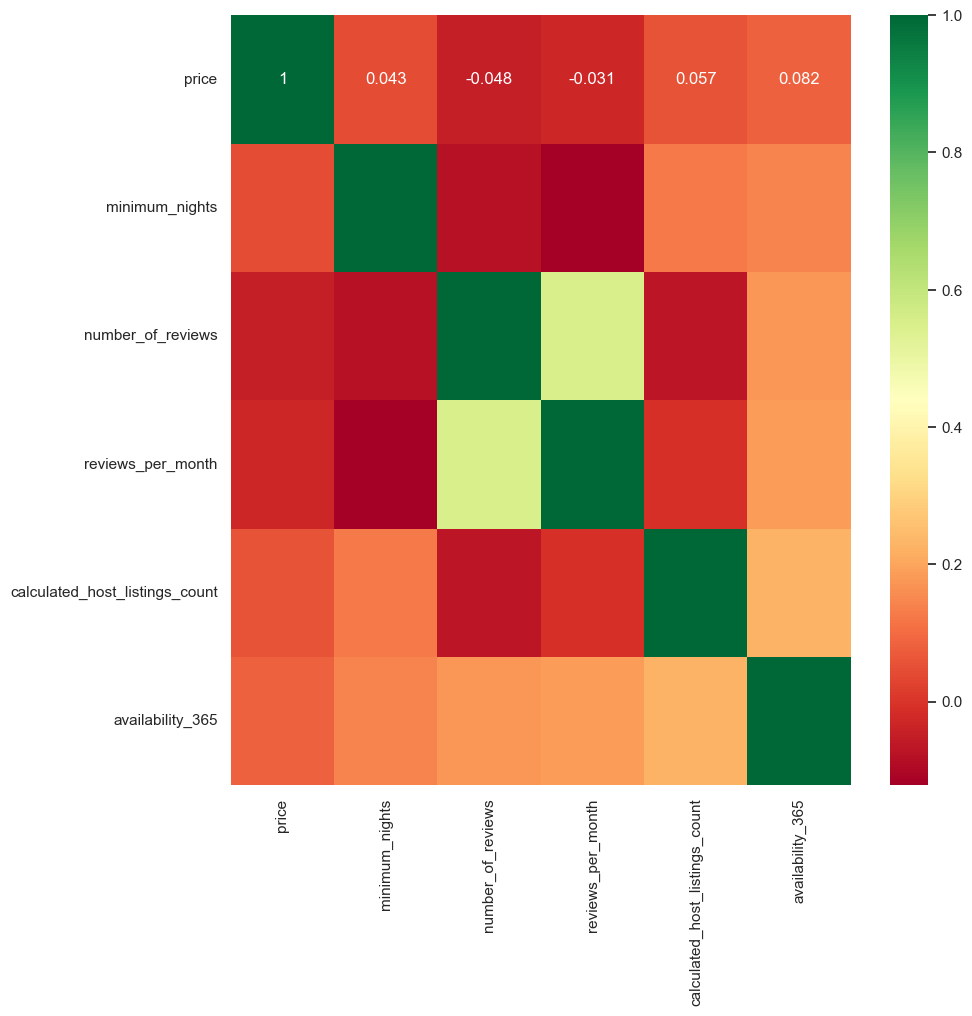

In [103]:
plt.figure(figsize=(10,10))
sns.heatmap(data=airbnb[num_cols].corr(), annot=True, cmap='RdYlGn')
plt.show()

### 7.2 Finding Top correlations

In [104]:
correlation_matrix = airbnb[num_cols].corr().abs()

#we are extracting the top part of the triangle matrix without diagonal (k = 1)

sol = (correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

In [105]:
sol

number_of_reviews               reviews_per_month                 0.549868
calculated_host_listings_count  availability_365                  0.225701
reviews_per_month               availability_365                  0.185791
number_of_reviews               availability_365                  0.172028
minimum_nights                  availability_365                  0.144303
                                calculated_host_listings_count    0.127960
                                reviews_per_month                 0.121702
price                           availability_365                  0.081829
minimum_nights                  number_of_reviews                 0.080116
number_of_reviews               calculated_host_listings_count    0.072376
price                           calculated_host_listings_count    0.057472
                                number_of_reviews                 0.047954
                                minimum_nights                    0.042799
                         

#### Top correlation are given below

In [106]:
sol[0:7]

number_of_reviews               reviews_per_month                 0.549868
calculated_host_listings_count  availability_365                  0.225701
reviews_per_month               availability_365                  0.185791
number_of_reviews               availability_365                  0.172028
minimum_nights                  availability_365                  0.144303
                                calculated_host_listings_count    0.127960
                                reviews_per_month                 0.121702
dtype: float64

### 7.3 price vs number_of_reviews_categories 

#### To understand the correlation between price and number of reviews

In [107]:
x1 = airbnb.groupby('number_of_reviews_categories').price.sum().sort_values(ascending = False)
x1

number_of_reviews_categories
very Low     2722793
Low          1420309
very High    1356076
High         1155254
Medium        812846
Name: price, dtype: int64

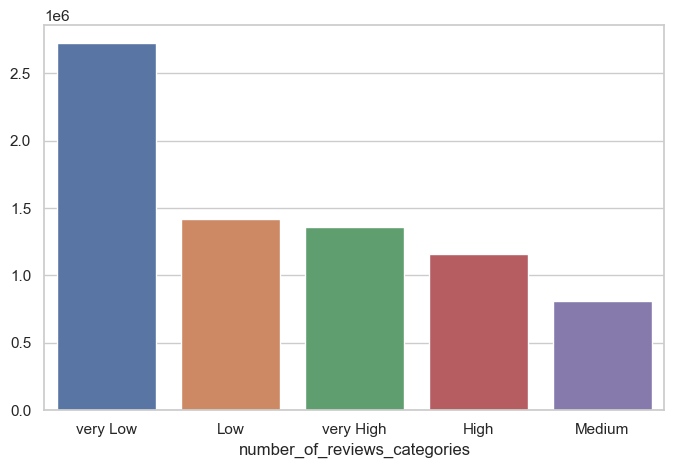

In [108]:
plt.figure(figsize=(8,5))
sns.barplot(x = x1.index,y = x1.values)
plt.show()

<Axes: xlabel='number_of_reviews_categories', ylabel='price'>

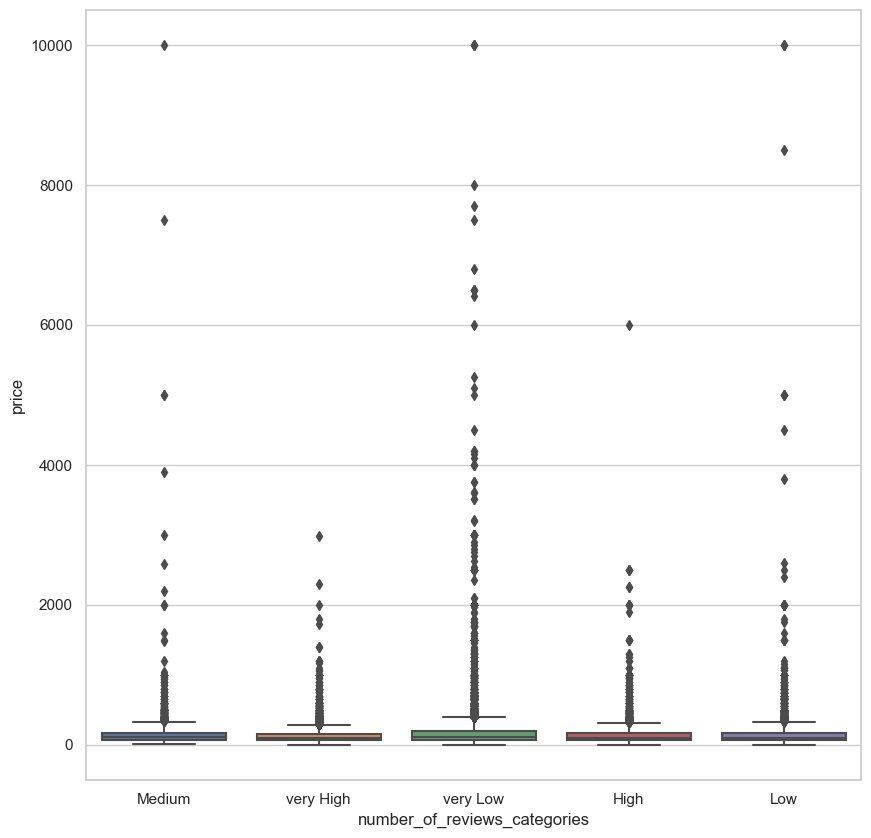

In [109]:
plt.figure(figsize=(10,10))
sns.boxplot(x = airbnb.number_of_reviews_categories , y = airbnb.price)

In [110]:
airbnb.groupby('number_of_reviews_categories').price.mean().sort_values()

number_of_reviews_categories
very High    131.199303
High         140.268820
Low          147.995103
Medium       149.695396
very Low     178.006865
Name: price, dtype: float64

In [111]:
airbnb.groupby('number_of_reviews_categories').price.median().sort_values()

number_of_reviews_categories
High         100.0
very High    100.0
Low          105.0
Medium       110.0
very Low     115.0
Name: price, dtype: float64

In [112]:
x2 = pd.DataFrame(x1)
x2 = x2.reset_index()
x2

,number_of_reviews_categories,price
0,very Low,2722793
1,Low,1420309
2,very High,1356076
3,High,1155254
4,Medium,812846


In [113]:
((x2.groupby('number_of_reviews_categories').price.sum()/x2.price.sum())*100).sort_values(ascending = True)

number_of_reviews_categories
Medium       10.885439
High         15.470885
very High    18.160245
Low          19.020438
very Low     36.462992
Name: price, dtype: float64

#### Listing with "very low" and "low" have high number of reviews

### 7.4 room_type vs  number_of_reviews_categories

#### To understand the relationship between type of rooms and number of reviews. 

In [114]:
pd.crosstab(airbnb['room_type'], airbnb['number_of_reviews_categories'])

number_of_reviews_categories,High,Low,Medium,very High,very Low
room_type,,,,,
Entire home/apt,4281,5177,3015,5306,7630
Private room,3758,4213,2290,4850,7215
Shared room,197,207,125,180,451


In [115]:
airbnb.groupby('room_type').number_of_reviews.sum() 

room_type
Entire home/apt    580403
Private room       538346
Shared room         19256
Name: number_of_reviews, dtype: int64

In [116]:
airbnb.groupby('room_type').number_of_reviews.sum()/airbnb.room_type.value_counts()

room_type
Entire home/apt    22.842418
Private room       24.112962
Shared room        16.600000
dtype: float64

#### Entire home/apt have more reviews than Shared rooms

### 7.5 'room_type' and 'price_categories'

#### To understand the relation between type of room and prices

In [117]:
pd.crosstab(airbnb['room_type'], airbnb['price_categories'])

price_categories,High,Low,Medium,very High,very Low
room_type,,,,,
Entire home/apt,2939,4384,13198,4698,190
Private room,227,12614,3297,480,5708
Shared room,10,369,88,30,663


#### The majority of "Entire home/apt" listings fall into the Medium price category, followed by Low and Very High categories. There are relatively few listings in the Very Low category

#### Most "Private room" listings are in the Low price category, followed by Very Low and Medium categories. There are very few listings in the High and Very High 

#### The majority of "Shared room" listings are in the Very Low price category, followed by Low. There are very few listings in the other price categories.

### 7.6 room_type vs reviews_per_month

#### To understand how many reviews each room type will receive per month

In [118]:
airbnb.groupby('room_type').reviews_per_month.mean()

room_type
Entire home/apt    1.306578
Private room       1.445209
Shared room        1.471726
Name: reviews_per_month, dtype: float64

#### For all the three types of room there are ~1.4 reviews per month on average.

### 7.7 minimum_night_categories vs reviews_per_month

In [119]:
airbnb.groupby('minimum_night_categories').reviews_per_month.sum().sort_values()

minimum_night_categories
High          1227.57
very High     2235.19
Medium        4689.73
very Low     20395.49
Low          24792.06
Name: reviews_per_month, dtype: float64

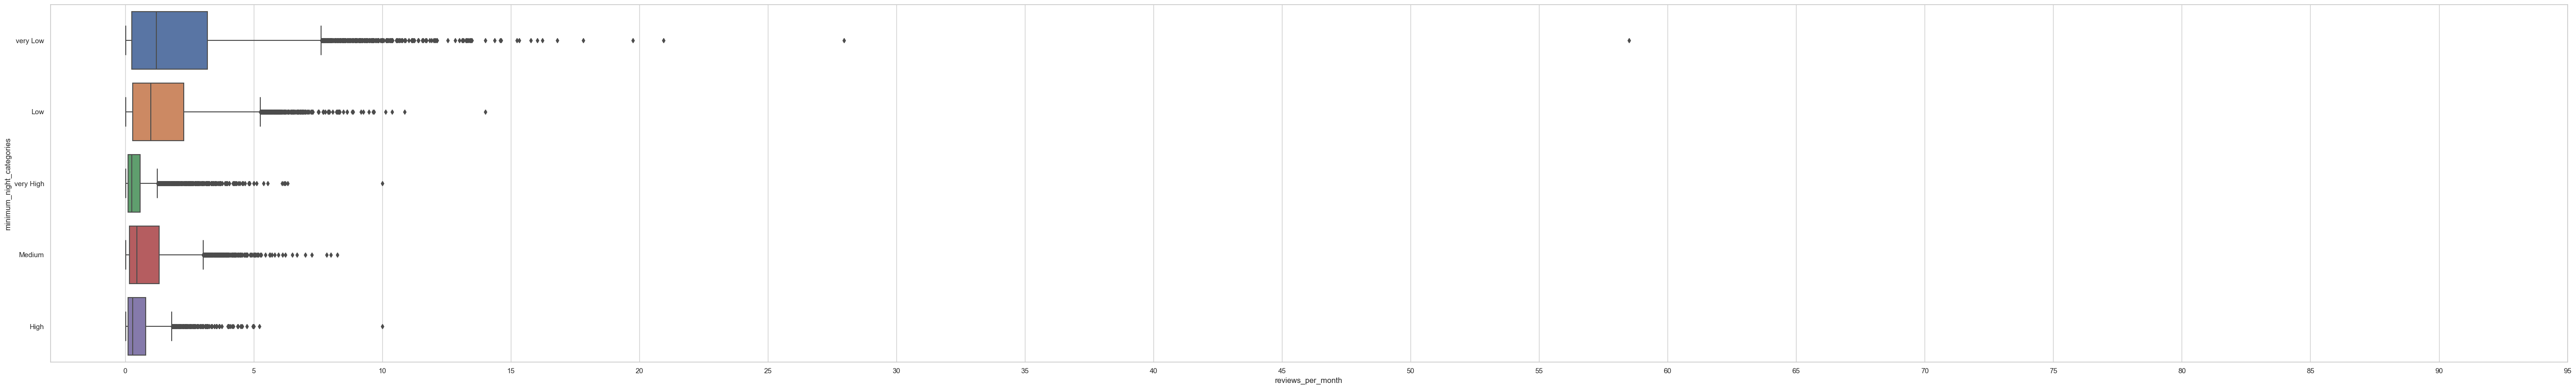

In [120]:
plt.figure(figsize=(70,10))
sns.boxplot(data = airbnb, y = 'minimum_night_categories' ,x = 'reviews_per_month')
plt.xticks(np.arange(0,100,5))
plt.show()

#### "Low" and "Very Low"  Minimum Night Categories: These categories dominate in terms of the total reviews per month, indicating that listings with lower minimum night requirements are more popular and receive more reviews.

### 7.8 availability_365_categories vs price_categories vs reviews_per_month

In [121]:
pd.DataFrame(airbnb.groupby(['availability_365_categories','price_categories']).reviews_per_month.mean())

reviews_per_month
availability_365_categories price_categories                   
High                        High                       1.956243
                            Low                        2.098447
                            Medium                     2.122116
                            very High                  2.062248
                            very Low                   1.789220
Low                         High                       1.450251
                            Low                        2.084674
                            Medium                     1.700431
                            very High                  1.350999
                            very Low                   2.091627
Medium                      High                       1.706095
                            Low                        2.130216
                            Medium                     1.891009
                            very High                  1.939057
                            very Low                   2.092531
very High                   High                       1.277655
                            Low                        1.642058
                            Medium                     1.178879
                            very High                  1.278092
                            very Low                   1.562514
very Low                    High                       0.428444
                            Low                        0.556875
                            Medium                     0.466402
                            very High                  0.403031
                            very Low                   0.498478

#### Listings with more availability tend to receive more reviews in the medium and low price categories.
#### Listings with less availability generally receive fewer reviews, regardless of price category.
#### Lower-priced listings tend to receive higher average reviews across different availability categories.

In [122]:
airbnb.to_csv('AB_NYC_2019_processed.csv')

PermissionError: [Errno 13] Permission denied: 'AB_NYC_2019_processed.csv'